In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import numpy.core.multiarray
import matplotlib.pyplot as plt

In [2]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'n_s', 'A_s', 'tau_reio'])
centers = np.array([0.02222,  0.120,  0.69,  0.966, 2.2e-9, 0.06])
steps = np.array([0.0002,     0.001,    0.007,   0.01, 2e-11, 0.006])

dm_pars = np.array( ['m_ncdm', 'N_ur','sigma_dmeff'])
dm_centers = np.array([0.06, 3.046, 0])
dm_steps = np.array([0.02, 0.08, 1e-42])
dm_labels = [r'$\sum m_\mathrm{\nu}$', r'$N_{eff}$',r'$\sigma_\mathrm{p}$']

linear_obs = Observables(parameters=dm_pars,
                  fiducial=dm_centers,
                  left=dm_centers-dm_steps,
                  right=dm_centers+dm_steps)

halofit_obs = Observables(parameters=dm_pars,
                  fiducial=dm_centers,
                  left=dm_centers-dm_steps,
                  right=dm_centers+dm_steps)

EFT_obs = Observables(parameters=dm_pars,
                  fiducial=dm_centers,
                  left=dm_centers-dm_steps,
                  right=dm_centers+dm_steps)

In [12]:
linear_template = {'N_ncdm':1,
                   'omega_cdm':0,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'omega_dmeff':0.120,
                   'm_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'output': 'mPk tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes' }

EFT_template = {'N_ncdm':1,
                   'omega_cdm':0,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'omega_dmeff':0.120,
                   'm_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'output': 'mPk tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear':'PT',
                   'IR resummation':'Yes',
                   'Bias tracers':'Yes',
                   'cb':'No',
                   'RSD':'Yes',
                   'AP':'Yes',
                   'Omfid':'0.31'} 

halofit_template = {'N_ncdm':1,
                   'omega_cdm':0,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'omega_dmeff':0.120,
                   'm_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,'output': 'mPk tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'non linear':'halofit',
                   'lensing': 'yes'}

Planck_assumption = CMB_Primary(
    theta_fwhm=[14,10,7.,5.,5.], sigma_T=[137,65.,43.,66.,200], sigma_P=[450,103.,81.,134.,406],
    f_sky=0.6, l_min=2, l_max=2500)
CMBS4_assumption = CMB_Primary(
    theta_fwhm=[1.5], sigma_T=[1.0], sigma_P=[1.0],
    f_sky=0.4, l_min=300, l_max=2500)


In [13]:
# add in fiducial values & generate fiducial cosmology for linear
linear_template.update(dict(zip(linear_obs.parameters, linear_obs.fiducial)))
linear_obs.compute_cosmo(key='fiducial', classy_dict=linear_template)

for par, par_left, par_right in zip(linear_obs.parameters, linear_obs.left, linear_obs.right):
    linear_left = linear_template.copy()
    linear_left[par] = par_left
    linear_right = linear_template.copy()
    linear_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    linear_obs.compute_cosmo(key=par + '_left', classy_dict=linear_left)
    linear_obs.compute_cosmo(key=par + '_right', classy_dict=linear_right)

linear_fisher = Planck_assumption.get_fisher(linear_obs)
linear_cov = np.linalg.inv(linear_fisher)

In [14]:
# add in fiducial values & generate fiducial cosmology for EFT
EFT_template.update(dict(zip(EFT_obs.parameters, EFT_obs.fiducial)))
EFT_obs.compute_cosmo(key='fiducial', classy_dict=EFT_template)

for par, par_left, par_right in zip(EFT_obs.parameters, EFT_obs.left, EFT_obs.right):
    EFT_left = EFT_template.copy()
    EFT_left[par] = par_left
    EFT_right = EFT_template.copy()
    EFT_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    EFT_obs.compute_cosmo(key=par + '_left', classy_dict=EFT_left)
    EFT_obs.compute_cosmo(key=par + '_right', classy_dict=EFT_right)

EFT_fisher = Planck_assumption.get_fisher(EFT_obs)
EFT_cov = np.linalg.inv(EFT_fisher)

In [15]:
# add in fiducial values & generate fiducial cosmology for halofit
halofit_template.update(dict(zip(halofit_obs.parameters, halofit_obs.fiducial)))
halofit_obs.compute_cosmo(key='fiducial', classy_dict=halofit_template)

for par, par_left, par_right in zip(halofit_obs.parameters, halofit_obs.left, halofit_obs.right):
    halofit_left = halofit_template.copy()
    halofit_left[par] = par_left
    halofit_right = halofit_template.copy()
    halofit_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    halofit_obs.compute_cosmo(key=par + '_left', classy_dict=halofit_left)
    halofit_obs.compute_cosmo(key=par + '_right', classy_dict=halofit_right)

halofit_fisher = Planck_assumption.get_fisher(halofit_obs)
halofit_cov = np.linalg.inv(halofit_fisher)

generating new axis
['$\\mathrm{m\\_ncdm}$', '$\\mathrm{N\\_ur}$', '$\\mathrm{sigma\\_dmeff}$']
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$']
['$\\omega_b$', '$\\omega_{cdm}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$']


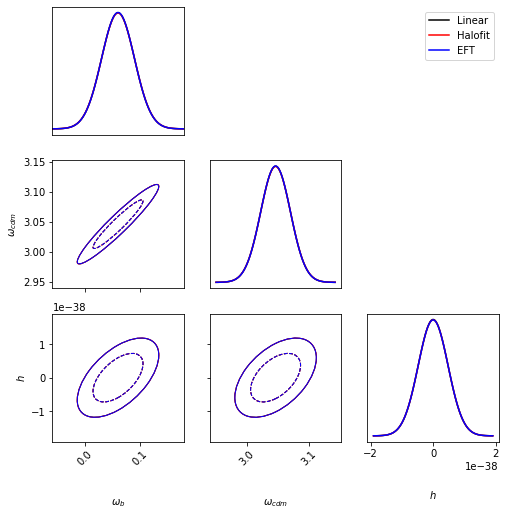

In [16]:
# plotting!
labels = [r'$\omega_b$', r'$\omega_{cdm}$', r'$h$',  r'$n_s$', r'$A_s$', r'$\tau_{reio}$']
fig, axes = fishchips.util.plot_triangle_base(dm_pars, dm_centers, linear_cov, dm_labels)
                                              
fishchips.util.plot_triangle_base(dm_pars, dm_centers, halofit_cov, 
                                  f=fig, ax=axes, labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'red'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'red'},
                                  color_1d='red'
                                 );

fishchips.util.plot_triangle_base(dm_pars, dm_centers, EFT_cov, 
                                  f=fig, ax=axes, labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'blue'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'blue'},
                                  color_1d='blue'
                                 );

l1, = axes[0, -1].plot([],[],'-',color="black", label='Linear')
l2, = axes[0, -1].plot([],[],'-',color="red", label='Halofit')
l3, = axes[0, -1].plot([],[],'-',color="blue", label='EFT')
axes[0, -1].legend()
plot = axes[0, -1].get_figure()
plot.savefig('fisher dark section params.png')

Dark Section

In [19]:
import pickle
premades = pickle.load( (open("../data/premades.p", "rb")) )

premades

{'Planck': [<fishchips.experiments.CMB_Primary at 0x7fede06dbba8>,
 'S3': [<fishchips.experiments.CMB_Primary at 0x7fede06db358>,
 'S4': [<fishchips.experiments.CMB_Primary at 0x7fede06d0f60>,
  <fishchips.cmb_lensing.CMB_Lensing_Only at 0x7fedfc3769b0>]}

In [18]:
import pickle
premades = pickle.load( (open("../data/premades.p", "rb")) )

linear_cmbs4_fisher = np.sum([exp.get_fisher(linear_obs, lensed_Cl=True)
                  for exp in premades["S4"]], axis=0)[0][0]
linear_cmbs4_cov = np.linalg.inv(linear_cmbs4_fisher)

halofit_cmbs4_fisher = np.sum([exp.get_fisher(halofit_obs, lensed_Cl=True)
                  for exp in premades["S4"]], axis=0)[0][0]
halofit_cmbs4_cov = np.linalg.inv(halofit_cmbs4_fisher)

EFT_cmbs4_fisher = np.sum([exp.get_fisher(EFT_obs, lensed_Cl=True)
                  for exp in premades["S4"]], axis=0)[0][0]
EFT_cmbs4_cov = np.linalg.inv(EFT_cmbs4_fisher)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
# now plot
dm_labels = [r'$\sum m_\mathrm{\nu}$', r'$N_{eff}$',r'$\sigma_\mathrm{p}$']
fig_2, axes_2 = fishchips.util.plot_triangle_base(dm_pars, dm_centers, CMBS4_cov_lensed, labels=dm_labels);
fishchips.util.plot_triangle_base(dm_pars, dm_centers, CMBS4_cov_unlensed, 
                                  f=fig_2, ax=axes_2, labels=dm_labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'blue'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'blue'},
                                  color_1d='blue'
                                 );
l1, = axes_2[0, -1].plot([],[],'-',color="black", label='Lensed TT/TE/EE')
l2, = axes_2[0, -1].plot([],[],'-',color="blue", label='unlensed TT/TE/EE')
axes_2[0, -1].legend()
# fig_2.savefig('dm comparison.pdf',format='pdf')